# DB 와 자료준비

매번 인터넷으로 받아오면 시간이 너무 오래 걸리기에, csv 파일로 내보내진 파일을 불러와서 DB 에 넣고 바로 시작한다.

In [1]:
import pandas as pd # 데이터프레임워크
from sqlalchemy import create_engine # 데이터베이스 툴킷
#### create table
# http://docs.sqlalchemy.org/en/latest/orm/tutorial.html
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# types 
# http://docs.sqlalchemy.org/en/latest/core/type_basics.html
from sqlalchemy import Column, Integer, String, Float

class CarInfo(Base):
    __tablename__ = 'car_info'

    id = Column(Integer, primary_key=True) 
    year = Column(Integer)
    company = Column(String(16))
    subname = Column(String(16))
    title = Column(String(16))
    mile = Column(Integer)
    vendor = Column(String(16))
    photos = Column(Integer)
    video = Column(Integer)
    exterior_color = Column(String(16))
    interior_color = Column(String(16))
    transmission = Column(String(16))
    drivertrain = Column(String(16))
    star = Column(Float)
    review_no = Column(String(16))
    price = Column(Integer)

    def __repr__(self):
        return rtform % (
                        self.id, self.year, self.company, self.subname, 
                        self.title, self.mile, self.vendor, 
                        self.photos, self.video, self.exterior_color, 
                        self.interior_color, self.transmission, self.drivertrain, 
                        self.star, self.review_no, self.price, )
    
    rtform = "<CarInfo(id = '%s', year = '%s', company = '%s', subname = '%s',title = '%s', mile = '%s', vendor = '%s', photos = '%s', video = '%s', exterior_color = '%s', interior_color = '%s', transmission = '%s', drivertrain = '%s', star = '%s', review_no = '%s', price = '%s)>"

#pw = pickle.load(open('./Data/pw.p','rb'))

# write local car_info
#engine = create_engine("mysql+mysqldb://root:" + pw.data + "@127.0.0.1/car_info", echo=True)
engine = create_engine("mysql+mysqldb://root:0@mysql/test", echo=True)
    
Base.metadata.create_all(engine)



df= pd.read_csv('car_info.csv')
df.to_sql(name="car_info", con=engine, if_exists='replace')

2018-04-12 18:02:32,678 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2018-04-12 18:02:32,679 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 18:02:32,682 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2018-04-12 18:02:32,683 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 18:02:32,685 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8' and `Collation` = 'utf8_bin'
2018-04-12 18:02:32,686 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 18:02:32,687 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2018-04-12 18:02:32,688 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 18:02:32,690 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2018-04-12 18:02:32,691 INFO sqlalchemy.engine.base.Engine ()
2018-04-12 18:02:32,693 INFO sqlalchemy.engine.base.Engine SELECT CAST('test collated returns' AS CHAR CHARACTER SET utf8) COLLATE utf8_bin AS anon_1
2018-04-12 18

/opt/conda/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1569: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


2018-04-12 18:02:32,891 INFO sqlalchemy.engine.base.Engine COMMIT
2018-04-12 18:02:32,900 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2018-04-12 18:02:32,971 INFO sqlalchemy.engine.base.Engine INSERT INTO car_info (`index`, `Unnamed: 0`, company, drivertrain, exterior_color, interior_color, mile, photos, price, review_no, star, subname, title, transmission, vendor, video, year) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
2018-04-12 18:02:32,972 INFO sqlalchemy.engine.base.Engine ((0, 0, 'Subaru', '4wd', 'Desert Khaki', 'Black', 26525, 23, 17999, 43, 5.0, 'Crosstrek', 'Subaru Crosstrek 2.0i', '5-speed', '1st Choice Autos', 1, 2016), (1, 1, 'Mazda', '4wd', 'Silver', 'Gray', 118205, 21, 3750, 43, 5.0, 'Tribute', 'Mazda Tribute LX V6', '4-speed', '1st Choice Autos', 1, 2003), (2, 2, 'Ford', '4wd', 'Race Red', 'Black', 2330, 32, 53900, 244, 5.0, 'F-150', 'Ford F-150 Raptor', '1-speed', 'Gilbert & Baugh Ford', 1, 2018), (3, 3, 'Porsche', '4wd', 'Gray',

# 의존성 설치

In [1]:
import MySQLdb, pickle
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from collections import Counter

In [2]:
# read local car_info popular 
# pw = pickle.load(open('./Data/pw.p','rb'))

# http://mysql-python.sourceforge.net/MySQLdb.html

db = MySQLdb.connect(
    host="mysql",
    user="root",
    passwd='0',
    db='test',
    charset='utf8',
)

SQL_QUERY = """
    SELECT *
    FROM car_info;
"""

train = pd.read_sql(SQL_QUERY, db)
train.head(20)

,index,company,drivertrain,exterior_color,interior_color,mile,photos,price,review_no,star,subname,title,transmission,vendor,video,year
0,0,Toyota,rwd,Gray,Black,67105,22,25998,7,5.0,4Runner,Toyota 4Runner Limited,5-speed,CarMax Greenville,1,2012
1,1,Ford,4wd,Race Red,Black,2330,32,53900,244,5.0,F-150,Ford F-150 Raptor,1-speed,Gilbert & Baugh Ford,1,2018
2,2,Dodge,4wd,White,Black,24661,32,23997,10,5.0,Challenger,Dodge Challenger R/T Plus,6-speed,Exclusive Auto Wholesale,1,2016
3,3,Dodge,4wd,White,Gray,155795,32,14495,11,5.0,Sprinter,Dodge Sprinter 2500,5-speed,West Ridge Auto Sales,1,2006
4,4,Porsche,rwd,White,Black,24176,31,42440,11,5.0,Boxster,Porsche Boxster S,6-speed,United Imports Inc,1,2014
5,5,Toyota,4wd,Gray,Gray,181902,27,14995,24,5.0,Tundra,Toyota Tundra Grade,6-speed,Burnout Garage,1,2011
6,6,Toyota,4wd,White,Black / Blue,24206,22,17348,6,5.0,Camry,Toyota Camry SE w/Special Edition Pkg,6-speed,Ultimate Motor Cars,1,2016
7,7,Nissan,4wd,Beige,Gray,176089,32,4500,46,5.0,Xterra,Nissan Xterra SE,4-speed,Auto Max,1,2004
8,8,Ford,4wd,Ingot Silver Metallic,Black,79583,32,34995,29,5.0,F-150,Ford F-150 SVT Raptor,6-speed,Orlando MINI,1,2013
9,9,Subaru,4wd,Gray,Gray,199532,29,3950,16,5.0,Outback,Subaru Outback,6-speed,Sharp Motors,1,2008


In [3]:
company_list = []
# 모든 회사 중 가장 공통된(이름이 들쪽날쭉하지 않고 균일한 것)중 30개를 고른다.
# https://docs.python.org/2/library/collections.html#collections.Counter.most_common
for company in Counter(train.company).most_common(30):
    company_list.append(company[0])

In [4]:
# most_common 30 이 아닌 것들의 인덱스를 구한다.
idx_list = []
idx = 0
for i in train["company"]:
    if i not in company_list:
        idx_list.append(idx)
    idx += 1

In [5]:
# 행, 열 개수 반환
train.shape

(200, 16)

In [6]:
# 인덱스를 이용해서 most_common 30 만 남기고 train 데이터 프레임워크를 지운다.
train = train.drop(idx_list)
# 남아있는 데이터 프레임워크의 인덱스 컬럼을 생성한다.
train.shape
train

,index,company,drivertrain,exterior_color,interior_color,mile,photos,price,review_no,star,subname,title,transmission,vendor,video,year
0,0,Toyota,rwd,Gray,Black,67105,22,25998,7,5.0,4Runner,Toyota 4Runner Limited,5-speed,CarMax Greenville,1,2012
1,1,Ford,4wd,Race Red,Black,2330,32,53900,244,5.0,F-150,Ford F-150 Raptor,1-speed,Gilbert & Baugh Ford,1,2018
2,2,Dodge,4wd,White,Black,24661,32,23997,10,5.0,Challenger,Dodge Challenger R/T Plus,6-speed,Exclusive Auto Wholesale,1,2016
3,3,Dodge,4wd,White,Gray,155795,32,14495,11,5.0,Sprinter,Dodge Sprinter 2500,5-speed,West Ridge Auto Sales,1,2006
4,4,Porsche,rwd,White,Black,24176,31,42440,11,5.0,Boxster,Porsche Boxster S,6-speed,United Imports Inc,1,2014
5,5,Toyota,4wd,Gray,Gray,181902,27,14995,24,5.0,Tundra,Toyota Tundra Grade,6-speed,Burnout Garage,1,2011
6,6,Toyota,4wd,White,Black / Blue,24206,22,17348,6,5.0,Camry,Toyota Camry SE w/Special Edition Pkg,6-speed,Ultimate Motor Cars,1,2016
7,7,Nissan,4wd,Beige,Gray,176089,32,4500,46,5.0,Xterra,Nissan Xterra SE,4-speed,Auto Max,1,2004
8,8,Ford,4wd,Ingot Silver Metallic,Black,79583,32,34995,29,5.0,F-150,Ford F-150 SVT Raptor,6-speed,Orlando MINI,1,2013
9,9,Subaru,4wd,Gray,Gray,199532,29,3950,16,5.0,Outback,Subaru Outback,6-speed,Sharp Motors,1,2008


In [7]:
train.reset_index(drop=True, inplace=True)
# 이빠진 인덱스 컬럼을 제거한다.
# train = train.drop("index", axis=1)
train.shape

(195, 16)

In [8]:
train

,index,company,drivertrain,exterior_color,interior_color,mile,photos,price,review_no,star,subname,title,transmission,vendor,video,year
0,0,Toyota,rwd,Gray,Black,67105,22,25998,7,5.0,4Runner,Toyota 4Runner Limited,5-speed,CarMax Greenville,1,2012
1,1,Ford,4wd,Race Red,Black,2330,32,53900,244,5.0,F-150,Ford F-150 Raptor,1-speed,Gilbert & Baugh Ford,1,2018
2,2,Dodge,4wd,White,Black,24661,32,23997,10,5.0,Challenger,Dodge Challenger R/T Plus,6-speed,Exclusive Auto Wholesale,1,2016
3,3,Dodge,4wd,White,Gray,155795,32,14495,11,5.0,Sprinter,Dodge Sprinter 2500,5-speed,West Ridge Auto Sales,1,2006
4,4,Porsche,rwd,White,Black,24176,31,42440,11,5.0,Boxster,Porsche Boxster S,6-speed,United Imports Inc,1,2014
5,5,Toyota,4wd,Gray,Gray,181902,27,14995,24,5.0,Tundra,Toyota Tundra Grade,6-speed,Burnout Garage,1,2011
6,6,Toyota,4wd,White,Black / Blue,24206,22,17348,6,5.0,Camry,Toyota Camry SE w/Special Edition Pkg,6-speed,Ultimate Motor Cars,1,2016
7,7,Nissan,4wd,Beige,Gray,176089,32,4500,46,5.0,Xterra,Nissan Xterra SE,4-speed,Auto Max,1,2004
8,8,Ford,4wd,Ingot Silver Metallic,Black,79583,32,34995,29,5.0,F-150,Ford F-150 SVT Raptor,6-speed,Orlando MINI,1,2013
9,9,Subaru,4wd,Gray,Gray,199532,29,3950,16,5.0,Outback,Subaru Outback,6-speed,Sharp Motors,1,2008


Feature engineering

In [9]:
# 분류 특징(열)을 회사명과 서브이름으로
categorical_features = ['company', 'subname']

In [10]:
# 더미 데이터 생성. 두 특성의 상관을 분석하기 위해..
# 값이 없는 문자데이터이기 때문에 좌표를 부여해 준 것과 같다.
# 더미는 행렬로 생성
dummy_cat = pd.get_dummies(train[categorical_features])
dummy_cat.head()

,company_Acura,company_Alfa,company_Audi,company_BMW,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,company_Ford,company_GMC,...,subname_Tucson,subname_Tundra,subname_Viper,subname_Volt,subname_WRX,subname_Wrangler,subname_X3,subname_Xterra,subname_Yukon,subname_i-MiEV
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 숫자 특성(열) 설정
numerical_features = ['year', 'mile','price']

In [12]:
# 숫자 특성(열)의 값들을 로그함수로 노멀라이즈 해준다. 숫자 크기 뿐 아니라 편차도 줄어든다.
normalize_num = np.log1p(train[numerical_features])
normalize_num.head()

,year,mile,price
0,7.607381,11.114029,10.165813
1,7.610358,7.754053,10.894904
2,7.609367,10.113019,10.085726
3,7.604396,11.956303,9.581628
4,7.608374,10.093157,10.655870


In [13]:
# pre_train = pd.merge(normalize_num, dummy_cat) 
# 특성들을 합쳐준다.
X_train_0 = normalize_num.join(dummy_cat)
X_train_0.head()

,year,mile,price,company_Acura,company_Alfa,company_Audi,company_BMW,company_Cadillac,company_Chevrolet,company_Chrysler,...,subname_Tucson,subname_Tundra,subname_Viper,subname_Volt,subname_WRX,subname_Wrangler,subname_X3,subname_Xterra,subname_Yukon,subname_i-MiEV
0,7.607381,11.114029,10.165813,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.610358,7.754053,10.894904,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.609367,10.113019,10.085726,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.604396,11.956303,9.581628,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.608374,10.093157,10.655870,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 값 특징열을 y_traing 이라는 데이터 페이스로 설정하고
y_train = X_train_0["price"]

y_train.head()

0    10.165813
1    10.894904
2    10.085726
3     9.581628
4    10.655870
Name: price, dtype: float64

In [15]:
# 이 특징열을 뺀 나머지 정보를 X_train 에 넣는다.
X_train = X_train_0.drop("price", axis=1)
X_train.head()

,year,mile,company_Acura,company_Alfa,company_Audi,company_BMW,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,...,subname_Tucson,subname_Tundra,subname_Viper,subname_Volt,subname_WRX,subname_Wrangler,subname_X3,subname_Xterra,subname_Yukon,subname_i-MiEV
0,7.607381,11.114029,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.610358,7.754053,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.609367,10.113019,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7.604396,11.956303,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7.608374,10.093157,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:

# xgboost 는 분류기를 세트로 묶어서 정확도를 축정하는 예측 기법
# https://github.com/dmlc/xgboost/tree/master/python-package
from xgboost import XGBRegressor
# http://scikit-learn.org/stable/install.html
# 교차검정, 모델선택, KFOLD - 다모름
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=2018)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
clf = XGBRegressor(n_estimators=1000, learning_rate=0.05, verbose=False)

In [18]:
%time score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=-1, scoring="r2").mean()

print("Score = {0:.5f}".format(score))

CPU times: user 60 ms, sys: 10 ms, total: 70 ms
Wall time: 2.07 s
Score = 0.57728


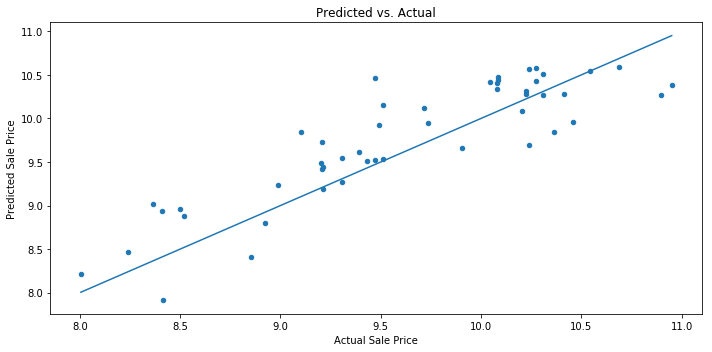

In [21]:
clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [20]:
print("most 30 company ",company_list)
company = str(input("company: "))
subname = str(input("subname: "))
year = int(input("year: "))
mile = int(input("mile: "))

most 30 company  ['Toyota', 'Ford', 'Chevrolet', 'BMW', 'Mercedes-Benz', 'Dodge', 'Honda', 'Porsche', 'Nissan', 'Audi', 'Lexus', 'RAM', 'Hyundai', 'Acura', 'Jeep', 'Subaru', 'GMC', 'Chrysler', 'INFINITI', 'Hummer', 'Mitsubishi', 'Cadillac', 'Pontiac', 'Volkswagen', 'smart', 'Rolls-Royce', 'Mercury', 'Alfa', 'Kia', 'Land']
company: honda
subname: civic
year: 2007
mile: 2000


In [23]:
target = pd.DataFrame(columns = [X_train1.columns])

In [24]:
cdx = 0
for col in X_train.columns:
    if col == 'company'+"_"+company:
        break;
    cdx += 1
cdx

12

In [25]:
sdx = 0
for col in X_train.columns:
    if col == 'subname'+"_"+subname:
        break;
    sdx += 1
sdx

151

In [26]:
target_list = np.zeros_like(X_train.loc[0])

target_list[cdx] = 1
target_list[sdx] = 1
target_list[0] = year
target_list[1] = mile

IndexError: index 151 is out of bounds for axis 0 with size 151

In [27]:
for i in range(1):
    target.loc[i] = target_list

In [28]:
target

,year,mile,company_Acura,company_Alfa,company_Audi,company_BMW,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,...,subname_Tucson,subname_Tundra,subname_Viper,subname_Volt,subname_WRX,subname_Wrangler,subname_X3,subname_Xterra,subname_Yukon,subname_i-MiEV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
numerical_features = ['year', 'mile']
target[numerical_features] = np.log1p(target[numerical_features])

In [30]:
target

,year,mile,company_Acura,company_Alfa,company_Audi,company_BMW,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,...,subname_Tucson,subname_Tundra,subname_Viper,subname_Volt,subname_WRX,subname_Wrangler,subname_X3,subname_Xterra,subname_Yukon,subname_i-MiEV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
price_log = clf.predict(target)

In [32]:
price_log

array([8.589315], dtype=float32)

In [33]:
price = np.exp(price_log)
int(price)

5373